In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r"C:\Users\AS\Downloads\datahoax.xlsx")

In [4]:
df

,Yt
0,175
1,353
2,453
3,501
4,402
...,...
67,162
68,173
69,215
70,166


In [5]:
dates = pd.date_range(start='2019-01-01', periods=72, freq='M')

# Ubah ke bentuk supervised dengan lag 1 sampai 3 (bisa disesuaikan)
df['Date'] = dates
for lag in range(1, 4):
    df[f'lag_{lag}'] = df['Yt'].shift(lag)

# Hapus NaN akibat lag
df.dropna(inplace=True)

C:\Users\AS\AppData\Local\Temp\ipykernel_16184\132171375.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2019-01-01', periods=72, freq='M')


In [6]:
df

,Yt,Date,lag_1,lag_2,lag_3
3,501,2019-04-30,453.0,353.0,175.0
4,402,2019-05-31,501.0,453.0,353.0
5,330,2019-06-30,402.0,501.0,453.0
6,348,2019-07-31,330.0,402.0,501.0
7,271,2019-08-31,348.0,330.0,402.0
...,...,...,...,...,...
67,162,2024-08-31,170.0,153.0,164.0
68,173,2024-09-30,162.0,170.0,153.0
69,215,2024-10-31,173.0,162.0,170.0
70,166,2024-11-30,215.0,173.0,162.0


In [7]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df

,Yt,Date,lag_1,lag_2,lag_3,Month,Year
3,501,2019-04-30,453.0,353.0,175.0,4,2019
4,402,2019-05-31,501.0,453.0,353.0,5,2019
5,330,2019-06-30,402.0,501.0,453.0,6,2019
6,348,2019-07-31,330.0,402.0,501.0,7,2019
7,271,2019-08-31,348.0,330.0,402.0,8,2019
...,...,...,...,...,...,...,...
67,162,2024-08-31,170.0,153.0,164.0,8,2024
68,173,2024-09-30,162.0,170.0,153.0,9,2024
69,215,2024-10-31,173.0,162.0,170.0,10,2024
70,166,2024-11-30,215.0,173.0,162.0,11,2024


In [8]:
df = df.drop(columns=['Date'])

In [9]:
df

,Yt,lag_1,lag_2,lag_3,Month,Year
3,501,453.0,353.0,175.0,4,2019
4,402,501.0,453.0,353.0,5,2019
5,330,402.0,501.0,453.0,6,2019
6,348,330.0,402.0,501.0,7,2019
7,271,348.0,330.0,402.0,8,2019
...,...,...,...,...,...,...
67,162,170.0,153.0,164.0,8,2024
68,173,162.0,170.0,153.0,9,2024
69,215,173.0,162.0,170.0,10,2024
70,166,215.0,173.0,162.0,11,2024


In [10]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the Month and Year columns
encoded = encoder.fit_transform(df[['Month', 'Year']])

# Create a DataFrame for the encoded columns
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Month', 'Year']), index=df.index)

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df.drop(columns=['Month', 'Year']), encoded_df], axis=1)
df

,Yt,lag_1,lag_2,lag_3,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2020,Year_2021,Year_2022,Year_2023,Year_2024
3,501,453.0,353.0,175.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,402,501.0,453.0,353.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,330,402.0,501.0,453.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,348,330.0,402.0,501.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,271,348.0,330.0,402.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,162,170.0,153.0,164.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
68,173,162.0,170.0,153.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69,215,173.0,162.0,170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,166,215.0,173.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Split the data: 7 for testing
train = df.iloc[:-7]
test = df.iloc[-7:]

X_train, y_train = train.drop('Yt', axis=1), train['Yt']
X_test, y_test = test.drop('Yt', axis=1), test['Yt']

# Train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape:.2%}')

MAPE: 13.34%


In [12]:
# Initialize variables for prediction
future_predictions = []
last_known_values = [X_test.iloc[-1]['lag_1'], X_test.iloc[-1]['lag_2'], X_test.iloc[-1]['lag_3']]

# Generate predictions for the next 24 months
for _ in range(24):
    # Create a new row with lag features
    new_row = {
        'lag_1': last_known_values[0],
        'lag_2': last_known_values[1],
        'lag_3': last_known_values[2],
        **{col: 0 for col in encoded_df.columns}  # Initialize one-hot encoded columns to 0
    }
    
    # Update the month and year one-hot encoding
    current_month = (_ % 12) + 1
    current_year = 2024 + (_ // 12)
    if f'Month_{current_month}' in new_row:
        new_row[f'Month_{current_month}'] = 1
    if f'Year_{current_year}' in new_row:
        new_row[f'Year_{current_year}'] = 1

    # Convert to DataFrame
    new_row_df = pd.DataFrame([new_row])

    # Predict the next value
    next_prediction = model.predict(new_row_df)[0]
    future_predictions.append(next_prediction)

    # Update the lag values
    last_known_values = [next_prediction] + last_known_values[:-1]

# Create a DataFrame for the predictions
future_dates = pd.date_range(start='2025-01-31', periods=24, freq='M')
future_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Yt': future_predictions
})

print(future_df)

         Date  Predicted_Yt
0  2025-01-31    147.715393
1  2025-02-28    147.232681
2  2025-03-31    130.017883
3  2025-04-30    136.367325
4  2025-05-31    139.798508
5  2025-06-30    122.770882
6  2025-07-31    146.921967
7  2025-08-31    129.094315
8  2025-09-30    149.072708
9  2025-10-31    125.607887
10 2025-11-30    134.194641
11 2025-12-31    127.995468
12 2026-01-31    151.968979
13 2026-02-28    126.699409
14 2026-03-31    165.772491
15 2026-04-30    146.599335
16 2026-05-31    160.536102
17 2026-06-30    126.810974
18 2026-07-31    145.735199
19 2026-08-31    130.111649
20 2026-09-30    149.833847
21 2026-10-31    123.993622
22 2026-11-30    129.138870
23 2026-12-31    145.121338


C:\Users\AS\AppData\Local\Temp\ipykernel_16184\1103593821.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2025-01-31', periods=24, freq='M')


In [13]:
future_df = pd.DataFrame(future_df)
future_df

,Date,Predicted_Yt
0,2025-01-31,147.715393
1,2025-02-28,147.232681
2,2025-03-31,130.017883
3,2025-04-30,136.367325
4,2025-05-31,139.798508
5,2025-06-30,122.770882
6,2025-07-31,146.921967
7,2025-08-31,129.094315
8,2025-09-30,149.072708
9,2025-10-31,125.607887


In [14]:
future_df['Date'] = pd.to_datetime(future_df['Date'])
future_df

,Date,Predicted_Yt
0,2025-01-31,147.715393
1,2025-02-28,147.232681
2,2025-03-31,130.017883
3,2025-04-30,136.367325
4,2025-05-31,139.798508
5,2025-06-30,122.770882
6,2025-07-31,146.921967
7,2025-08-31,129.094315
8,2025-09-30,149.072708
9,2025-10-31,125.607887


In [15]:
data = pd.read_excel(r"C:\Users\AS\Downloads\datahoax.xlsx")
data

,Yt
0,175
1,353
2,453
3,501
4,402
...,...
67,162
68,173
69,215
70,166


In [16]:
data['Date'] = pd.date_range(start='2019-01-01', end='2024-12-31', freq='M')
data

C:\Users\AS\AppData\Local\Temp\ipykernel_16184\3509506329.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Date'] = pd.date_range(start='2019-01-01', end='2024-12-31', freq='M')


,Yt,Date
0,175,2019-01-31
1,353,2019-02-28
2,453,2019-03-31
3,501,2019-04-30
4,402,2019-05-31
...,...,...
67,162,2024-08-31
68,173,2024-09-30
69,215,2024-10-31
70,166,2024-11-30


In [17]:
hasil = pd.concat([data, future_df], ignore_index=True)
hasil

,Yt,Date,Predicted_Yt
0,175.0,2019-01-31,NaN
1,353.0,2019-02-28,NaN
2,453.0,2019-03-31,NaN
3,501.0,2019-04-30,NaN
4,402.0,2019-05-31,NaN
...,...,...,...
91,NaN,2026-08-31,130.111649
92,NaN,2026-09-30,149.833847
93,NaN,2026-10-31,123.993622
94,NaN,2026-11-30,129.138870


In [18]:
hasil["Yt"].iloc[-24:] = hasil["Predicted_Yt"].iloc[-24:]
hasil

C:\Users\AS\AppData\Local\Temp\ipykernel_16184\2860950640.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  hasil["Yt"].iloc[-24:] = hasil["Predicted_Yt"].iloc[-24:]
C:\Users\AS\AppData\Local\Temp\ipykernel_16184\2860950640.py:1: SettingWi

,Yt,Date,Predicted_Yt
0,175.000000,2019-01-31,NaN
1,353.000000,2019-02-28,NaN
2,453.000000,2019-03-31,NaN
3,501.000000,2019-04-30,NaN
4,402.000000,2019-05-31,NaN
...,...,...,...
91,130.111649,2026-08-31,130.111649
92,149.833847,2026-09-30,149.833847
93,123.993622,2026-10-31,123.993622
94,129.138870,2026-11-30,129.138870


In [19]:
hasil = hasil.drop(columns=['Predicted_Yt'])
hasil

,Yt,Date
0,175.000000,2019-01-31
1,353.000000,2019-02-28
2,453.000000,2019-03-31
3,501.000000,2019-04-30
4,402.000000,2019-05-31
...,...,...
91,130.111649,2026-08-31
92,149.833847,2026-09-30
93,123.993622,2026-10-31
94,129.138870,2026-11-30


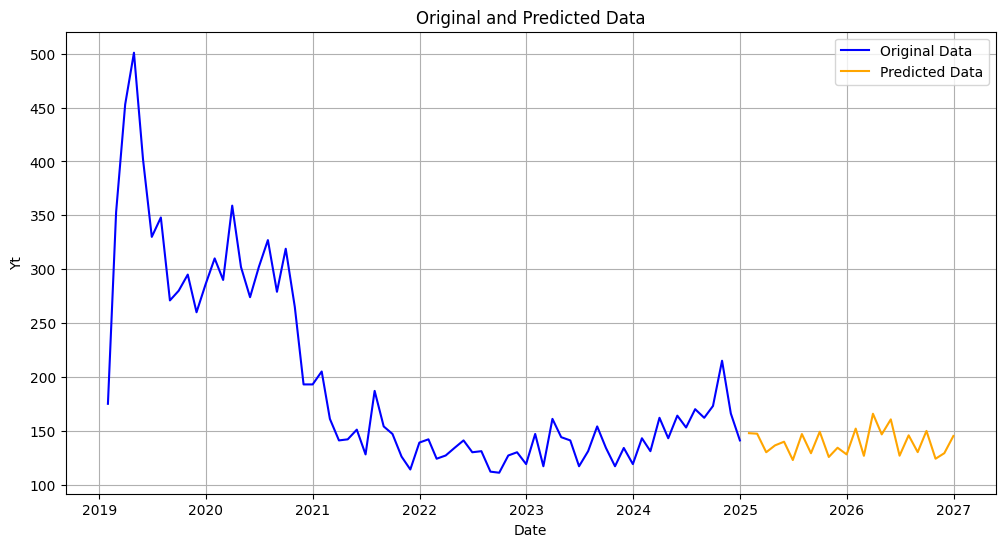

In [20]:
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(hasil['Date'][:-24], hasil['Yt'][:-24], label='Original Data', color='blue')

# Plot the last 24 entries with a different color
plt.plot(hasil['Date'][-24:], hasil['Yt'][-24:], label='Predicted Data', color='orange')

# Add labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Yt')
plt.title('Original and Predicted Data')
plt.legend()
plt.grid(True)

plt.show()

In [21]:
# Save as Excel
hasil.to_excel('hasil.xlsx', index=False)

PermissionError: [Errno 13] Permission denied: 'hasil.xlsx'